In [2]:
import numpy as np
import pandas as pd
import sys
import sys
import os
sys.path.append('../')
os.getcwd()
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [3]:
import src
import src.recommendation
reload(src.recommendation)
from src.recommendation import *

# Plot Trajectories with Pictures

- take dimension (e.g. red) that I've trained the nn features to classify and plot sequences in that dimension. 
- use sequences that have images

In [102]:
# our lib
from lib.resnet50 import ResNet50
from lib.imagenet_utils import preprocess_input, decode_predictions

#keras 
from keras.preprocessing import image
from keras.models import Model

import glob

def preprocess_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return(x,img)

In [100]:
# instantiate the model
base_model = ResNet50(include_top=False, weights='imagenet') #this will pull the weights from the folder 

# cut the model to lower levels only 
model = Model(input=base_model.input, output=base_model.get_layer('avg_pool').output)

../lib/resnet50.py:165: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (7, 7), strides=(2, 2), name="conv1")`
  x = Convolution2D(64, 7, 7, subsample=(2, 2), name='conv1')(x)
../lib/resnet50.py:90: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), strides=(1, 1), name="res2a_branch2a")`
  name=conv_name_base + '2a')(input_tensor)
../lib/resnet50.py:95: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", name="res2a_branch2b")`
  name=conv_name_base + '2b')(x)
../lib/resnet50.py:99: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (1, 1), name="res2a_branch2c")`
  x = Convolution2D(nb_filter3, 1, 1, name=conv_name_base + '2c')(x)
../lib/resnet50.py:103: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (1, 1), strides=(1, 1), name="res2a_branch1")`
  name=conv_name_base + '1')(input_tensor)
../lib/resnet50.py:106: UserWarning: The `merge` function 

../lib/resnet50.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same", name="res4f_branch2b")`
  border_mode='same', name=conv_name_base + '2b')(x)
../lib/resnet50.py:60: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (1, 1), name="res4f_branch2c")`
  x = Convolution2D(nb_filter3, 1, 1, name=conv_name_base + '2c')(x)
../lib/resnet50.py:90: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (1, 1), strides=(2, 2), name="res5a_branch2a")`
  name=conv_name_base + '2a')(input_tensor)
../lib/resnet50.py:95: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same", name="res5a_branch2b")`
  name=conv_name_base + '2b')(x)
../lib/resnet50.py:99: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2048, (1, 1), name="res5a_branch2c")`
  x = Convolution2D(nb_filter3, 1, 1, name=conv_name_base + '2c')(x)
../lib/resnet50.py:103: UserWarning: Update you

limit_output extension: Maximum message size of 10000 exceeded with 10692 characters

In [110]:
user_id = 106144465 

#get images 
folder = '../data_img_sample_item_view_sequences/'
img_files = glob.glob(folder+'*'+str(user_id)+'*')
print(img_files)


# make features 
trajectory_features = np.empty((len(img_files),2048))
for i,img_file in enumerate(img_files):
    x,img = preprocess_img(img_file) # preprocess
    trajectory_features[i,:] = model.predict(x)[0,0,0,:]
    

['../data_img_sample_item_view_sequences/106144465_1_82548633538732181_0_view_.jpg', '../data_img_sample_item_view_sequences/106144465_2_310261911240101889_11_view_.jpg', '../data_img_sample_item_view_sequences/106144465_3_75793218577661959_2_view_.jpg', '../data_img_sample_item_view_sequences/106144465_4_76074708321099781_5_view_.jpg', '../data_img_sample_item_view_sequences/106144465_5_98029795868614676_4_view_.jpg', '../data_img_sample_item_view_sequences/106144465_6_22313013691846692_3_view_.jpg', '../data_img_sample_item_view_sequences/106144465_7_467887899726037038_4_view_.jpg', '../data_img_sample_item_view_sequences/106144465_8_216812239953170449_21_buy_.jpg']


In [111]:
red_traj = np.dot(trajectory_features,red_weights)

target class
here


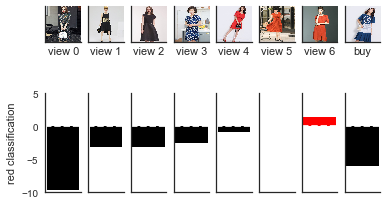

In [145]:
print('target class')
plt.figure(figsize=(12,6))
len_seq = len(img_files)

fig,axes = plt.subplots(2,len_seq)

# make color
color_red_black = pd.Series(red_traj>0).map({False:'k',True:'r'}).as_matrix()

for i in range(len_seq):
    img = image.load_img(img_files[i], target_size=(224, 224))

    # images
    axes[0,i].imshow(img)
    axes[0,i].set_xticklabels([])
    #axes[0,i].get_xaxis().set_visible(False)
    axes[0,i].get_xaxis().set_ticks([])
    axes[0,i].get_yaxis().set_visible(False) 
    if i<(len_seq-1):
        axes[0,i].set_xlabel('view '+str(i))
    else:
        axes[0,i].set_xlabel('buy')
         
    # bar 
    axes[1,i].bar(0,red_traj[i],color=color_red_black[i])
    axes[1,i].set_ylim([-10,5])
    axes[1,i].get_xaxis().set_visible(False)
    axes[1,i].axhline(y=0,linestyle='--',color='w')
    if i==0:
        print('here')
        axes[1,i].set_ylabel('red classification')
    else:
        axes[1,i].get_yaxis().set_visible(False) 
    sns.despine()
savefile = '../figures/example_sequence_interpretable_features_ui_'+str(user_id)+'.png'
plt.savefig(savefile,dpi=300)

In [152]:
reload(src.s3_data_management)
from src import s3_data_management
s3_data_management.push_results_to_s3(os.path.basename(savefile),savefile)

.........
https://s3-us-west-2.amazonaws.com/bishopbucket/proj_cdips/Results/example_sequence_interpretable_features_ui_106144465.png


# Plot Trajectories from User Profile Eval Dataset

- same as above, but without images. 

In [4]:
# load weights from the nn
red_weights = np.loadtxt('../data_nn_features/class_weights_LR_redpink.txt')

In [5]:
# load smaller user behavior dataset
user_profile = pd.read_pickle('../data_user_view_buy/user_profile_items_nonnull_features_20_mins_5_views_v2_sample1000.pkl')
user_sample = user_profile.user_id.unique()
print(len(user_profile))
print(len(user_sample))
user_profile.head()

40141
961


user_id            buy_spu    buy_sn  buy_ct3            view_spu  \
1226  3787002243  14994645517246498  10006541      334  221597279072104476   
1227  3787002243  14994645517246498  10006541      334   29349802448457744   
2261   132681117   6831894477217820  10001155      334   27661017974767638   
2262   132681117   6831894477217820  10001155      334  288869796837830741   
2263   132681117   6831894477217820  10001155      334  301817675098247170   

       view_sn  view_ct3  time_interval  view_cnt  view_seconds    index  \
1226  10005949       334         389705         4            98  87616.0   
1227  10004542       334           7342         1            10  73880.0   
2261  10004048       334          32451         1             6  21676.0   
2262  10000351       334          33318         2            30   6475.0   
2263  10020640       334         428149         1             9  25612.0   

            spu_id  view_spu_count  drop  
1226  2.215973e+17              11     0  
1227  2.934980e+16              11     0  
2261  2.766102e+16              63     0  
2262  2.888698e+17              63     0  
2263  3.018177e+17              63     0

In [6]:
# read nn features 
spu_fea = pd.read_pickle("../data_nn_features/spu_fea_sample1000.pkl")



In [7]:
spu_fea.head()

index               spu_id  \
2       4   100281553839460375   
10     17   102533309850574975   
11     18   102533356906119172   
16     26  1029993181497487363   
17     27   103096330169212941   

                                             features             view_spu  
2   [0.661, 1.84, 0.028, 1.128, 0.172, 1.097, 1.45...   100281553839460375  
10  [0.351, 0.066, 0.044, 0.648, 0.011, 0.0, 0.207...   102533309850574975  
11  [0.474, 0.903, 0.03, 0.495, 0.01, 0.003, 0.2, ...   102533356906119172  
16  [0.029, 0.347, 0.175, 0.789, 0.09, 0.0, 0.181,...  1029993181497487363  
17  [1.117, 0.826, 0.01, 0.058, 0.251, 0.783, 0.12...   103096330169212941

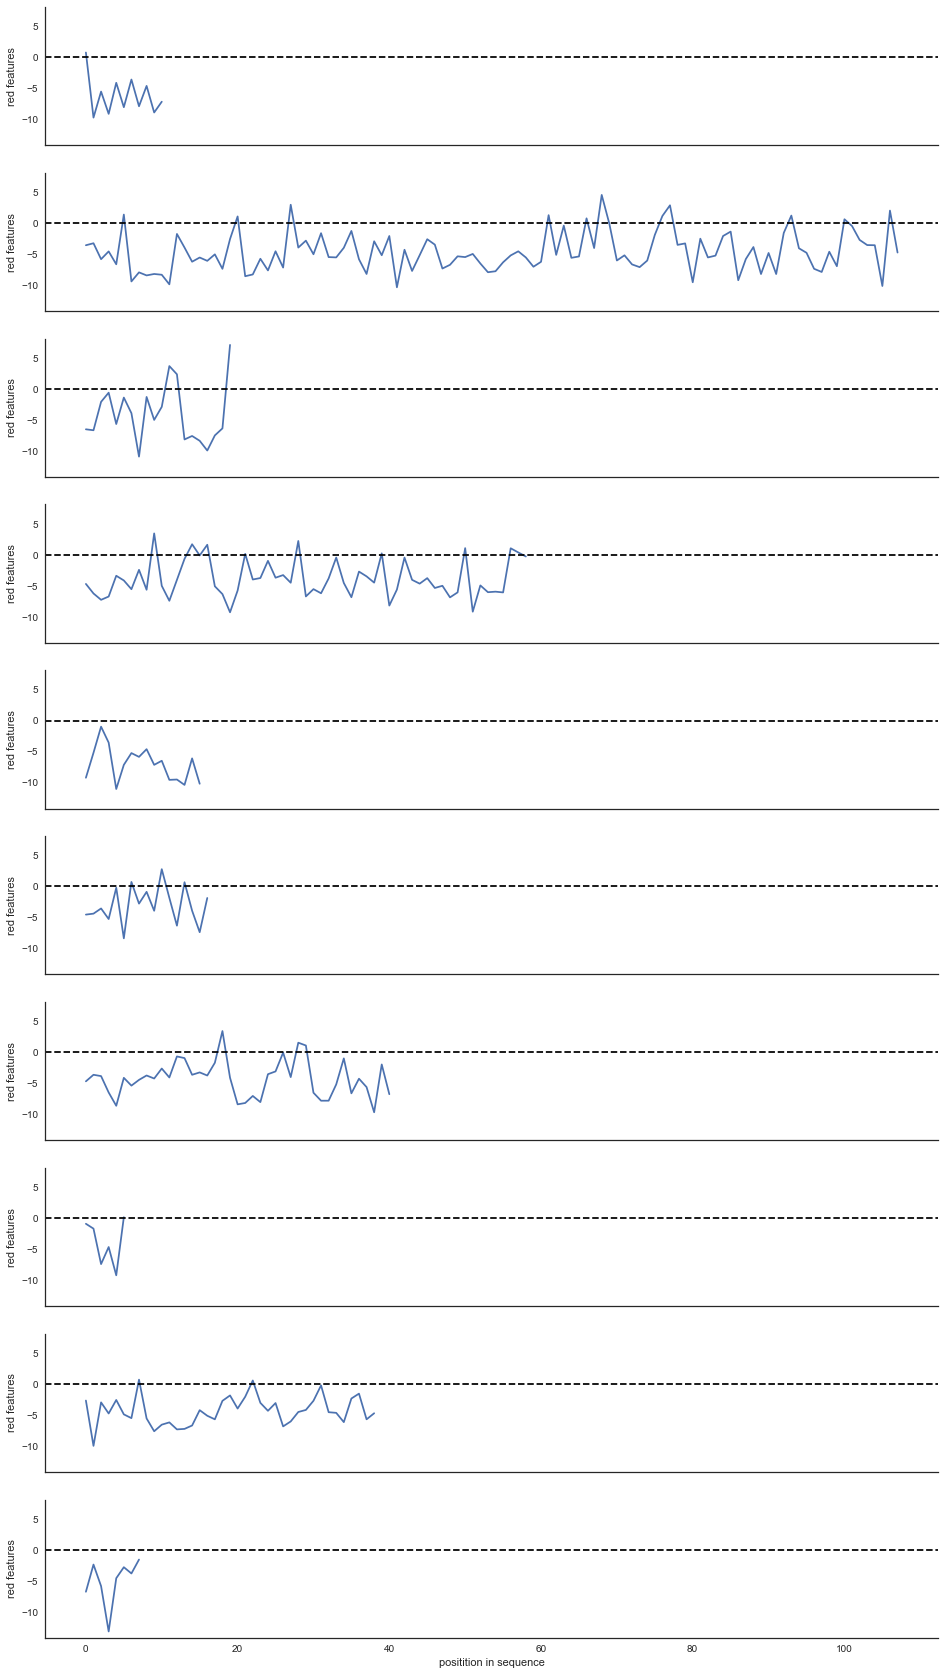

In [32]:
# sample users
size = 10
np.random.seed(1000)
user_ids = np.random.choice(user_profile.user_id.unique(),size=size)


fig,axes = plt.subplots(size,1,figsize=(16,3*size),sharex=True,sharey=True)

for ui,user_id in enumerate(user_ids):
    # get his trajectory
    trajectory = user_profile.loc[user_profile.user_id==user_id,]
    
    # get trajectory features (make a separate function # )
    trajectory_features = np.empty((len(trajectory),2048))
    for i,(index,row) in enumerate(trajectory.iterrows()):
        trajectory_features[i,:] = spu_fea.loc[spu_fea.spu_id==row['view_spu'],'features'].as_matrix()[0]
        
    # project onto red dimension
    red_traj = np.dot(trajectory_features,red_weights)

    # plot 
    axes[ui].plot(np.arange(len(red_traj)),red_traj)
    axes[ui].axhline(y=0,linestyle='--',color='k')
    axes[ui].set_ylabel('red features')
    sns.despine()
plt.xlabel('positition in sequence')
savefile = '../figures/example_sequences_red_10_users.png'
plt.savefig(savefile,dpi=300)

# Plot Trajectories from User Profile Eval Dataset using PCA



In [36]:
from sklearn.decomposition import PCA

In [33]:
# load smaller user behavior dataset
user_profile = pd.read_pickle('../data_user_view_buy/user_profile_items_nonnull_features_20_mins_5_views_v2_sample1000.pkl')
user_sample = user_profile.user_id.unique()
print(len(user_profile))
print(len(user_sample))
user_profile.head()

40141
961


user_id            buy_spu    buy_sn  buy_ct3            view_spu  \
1226  3787002243  14994645517246498  10006541      334  221597279072104476   
1227  3787002243  14994645517246498  10006541      334   29349802448457744   
2261   132681117   6831894477217820  10001155      334   27661017974767638   
2262   132681117   6831894477217820  10001155      334  288869796837830741   
2263   132681117   6831894477217820  10001155      334  301817675098247170   

       view_sn  view_ct3  time_interval  view_cnt  view_seconds    index  \
1226  10005949       334         389705         4            98  87616.0   
1227  10004542       334           7342         1            10  73880.0   
2261  10004048       334          32451         1             6  21676.0   
2262  10000351       334          33318         2            30   6475.0   
2263  10020640       334         428149         1             9  25612.0   

            spu_id  view_spu_count  drop  
1226  2.215973e+17              11     0  
1227  2.934980e+16              11     0  
2261  2.766102e+16              63     0  
2262  2.888698e+17              63     0  
2263  3.018177e+17              63     0

In [34]:
# read nn features 
spu_fea = pd.read_pickle("../data_nn_features/spu_fea_sample1000.pkl")


In [ ]:
# reduce dimensionality 
pca = pickle.load(open('../data_nn_features/pca_all_items_sample1000.pkl','rb'))

In [41]:
pca.components_.shape

(1000, 2048)

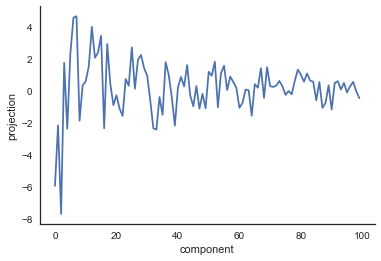

In [65]:
projection = pca.transform(X_item_feature[0,:].reshape(-1,1).T)
projection.shape
plt.plot(np.arange(100),projection[0,0:100])
plt.xlabel('component')
plt.ylabel('projection')
sns.despine()

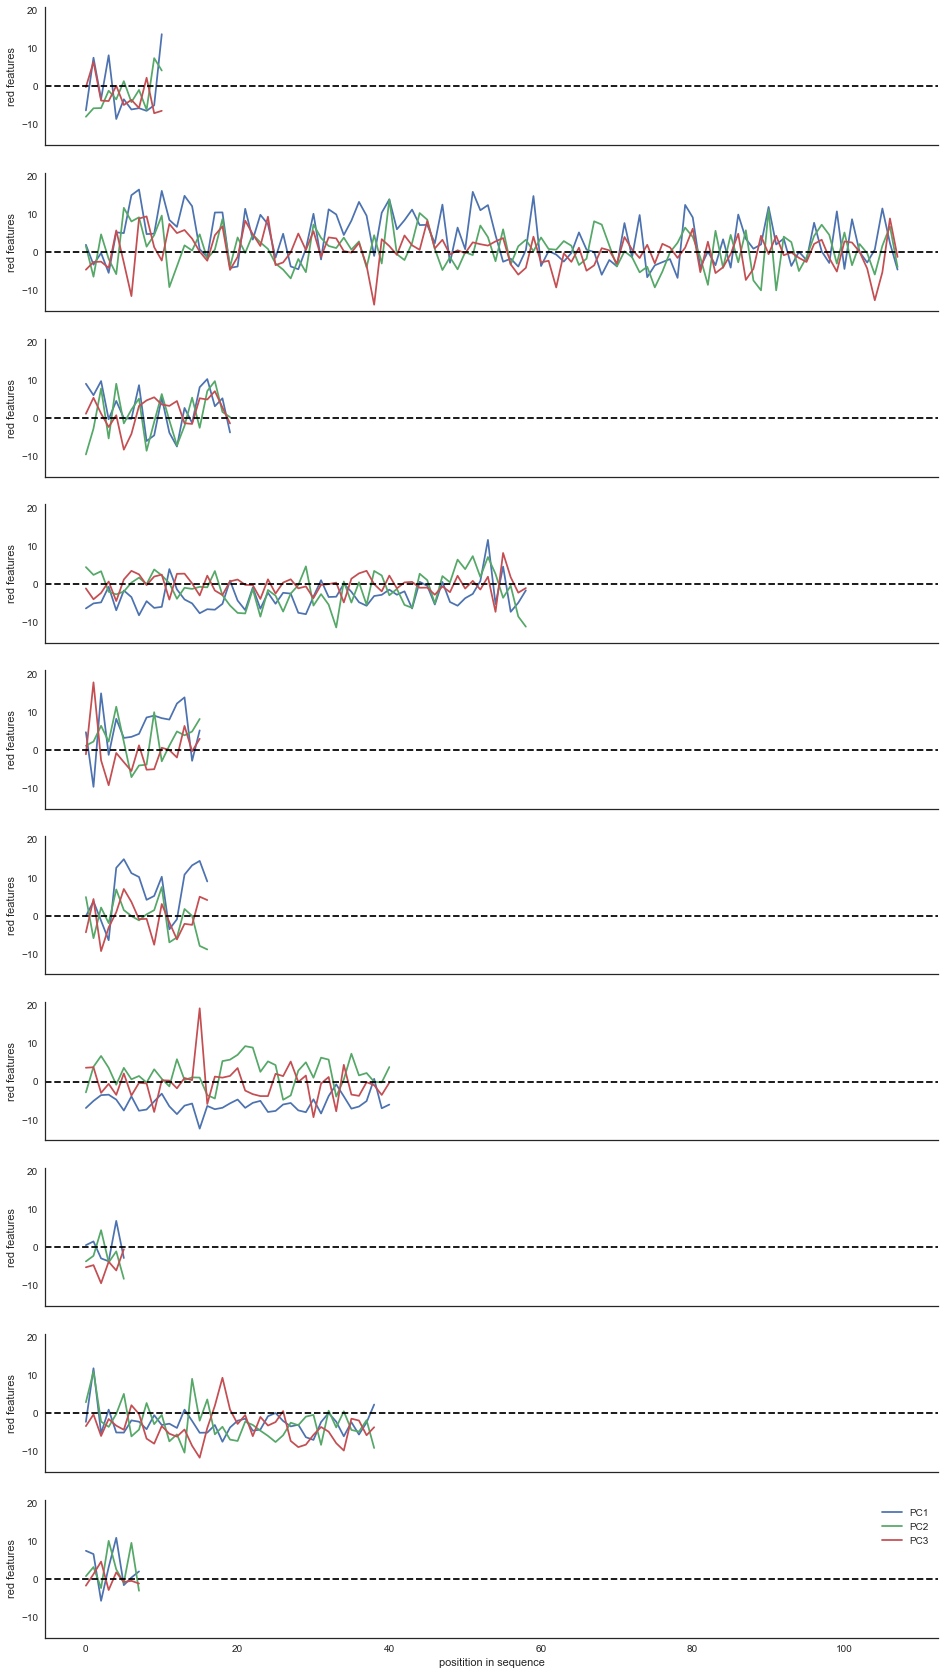

In [73]:
# sample users
size = 10
np.random.seed(1000)
user_ids = np.random.choice(user_profile.user_id.unique(),size=size)


fig,axes = plt.subplots(size,1,figsize=(16,3*size),sharex=True,sharey=True)

for ui,user_id in enumerate(user_ids):
    # get his trajectory
    trajectory = user_profile.loc[user_profile.user_id==user_id,]
    
    # get trajectory features (make a separate function # )
    trajectory_features = np.empty((len(trajectory),2048))
    for i,(index,row) in enumerate(trajectory.iterrows()):
        trajectory_features[i,:] = spu_fea.loc[spu_fea.spu_id==row['view_spu'],'features'].as_matrix()[0]
        
    # project onto pca dimension
    projected_traj = pca.transform(trajectory_features)
    
    # get first dimension 
    traj_PC1 = projected_traj[:,0]
    traj_PC2 = projected_traj[:,1]
    traj_PC3 = projected_traj[:,2]

    # plot 
    axes[ui].plot(traj_PC1,label='PC1')
    axes[ui].plot(traj_PC2,label='PC2')
    axes[ui].plot(traj_PC3,label='PC3')
    
    plt.legend()
    
    axes[ui].axhline(y=0,linestyle='--',color='k')
    axes[ui].set_ylabel('red features')
    sns.despine()
plt.xlabel('positition in sequence')
savefile = '../figures/example_sequences_PCA_10_users.png'
plt.savefig(savefile,dpi=300)

# Save 

In [153]:
%%bash 
#jupyter nbconvert --to Plotting_Sequences_in_low_dimensions.ipynb && mv Plotting_Sequences_in_low_dimensions.slides.html ../notebook_slides/Plotting_Sequences_in_low_dimensions_v1.slides.html
jupyter nbconvert --to html Plotting_Sequences_in_low_dimensions.ipynb && mv Exploring_Data.html ../notebook_htmls/Plotting_Sequences_in_low_dimensions_v1.html
cp Plotting_Sequences_in_low_dimensions.ipynb ../notebook_versions/Plotting_Sequences_in_low_dimensions_v1.ipynb

[NbConvertApp] Converting notebook Plotting_Sequences_in_low_dimensions.ipynb to html
[NbConvertApp] Writing 357480 bytes to Plotting_Sequences_in_low_dimensions.html
mv: rename Exploring_Data.html to ../notebook_htmls/Plotting_Sequences_in_low_dimensions_v1.html: No such file or directory
